In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
pd.set_option('display.max_columns', None)

In [3]:
df = pd.read_csv('C:/Users/SONY/Machine_Learning_Project/Processed_Data/gurgaon_properties_outlier_treated.csv')

In [4]:
df.head()

,society,property_type,price,price_per_sqft,areaWithType,area,bedRoom,bathroom,balcony,floorNum,facing,agePossession,property_id,sector,super_built_up_area,built_up_area,carpet_area,study room,servant room,store room,pooja room,others,furnishing_type,luxury_score,area_room_ratio
0,emaar palm gardens,flat,1.75,9211.0,Super Built up area 1900(176.52 sq.m.)Built Up...,1900.0,3.0,3,3,6.0,West,Relatively New,V69525180,sector 83,1900.0,1600.0,1240.0,0,1,0,0,0,2,150,633.333333
1,eros wembley estate,flat,1.40,10174.0,Super Built up area 1376(127.83 sq.m.),1376.0,3.0,3,2,9.0,East,Relatively New,K69325724,sector 50,1376.0,NaN,NaN,0,0,1,0,0,2,117,458.666667
2,ss the leaf,flat,2.13,7575.0,Super Built up area 2812(261.24 sq.m.)Built Up...,2812.0,4.0,4,3,6.0,North,Relatively New,K70087544,sector 85,2812.0,2600.0,2400.0,0,0,0,0,0,0,49,703.000000
3,international city by sobha phase 2,house,6.25,10035.0,Plot area 692(578.6 sq.m.),6228.0,5.0,7,3+,3.0,North-East,Relatively New,NaN,sector 109,NaN,6228.0,NaN,1,1,1,1,0,0,147,1245.600000
4,ss the coralwood,flat,1.10,4857.0,Super Built up area 1750(162.58 sq.m.),2265.0,3.0,3,2,9.0,North,Relatively New,H66415758,sector 84,1750.0,NaN,NaN,0,0,0,0,0,0,75,755.000000


In [5]:
df.shape

(3250, 25)

In [6]:
df.isnull().sum()

society                   1
property_type             0
price                     0
price_per_sqft            0
areaWithType              0
area                      0
bedRoom                   0
bathroom                  0
balcony                   0
floorNum                 19
facing                  884
agePossession             0
property_id             802
sector                    0
super_built_up_area    1546
built_up_area          1694
carpet_area            1638
study room                0
servant room              0
store room                0
pooja room                0
others                    0
furnishing_type           0
luxury_score              0
area_room_ratio           0
dtype: int64

### Built up area

<Axes: xlabel='built_up_area', ylabel='super_built_up_area'>

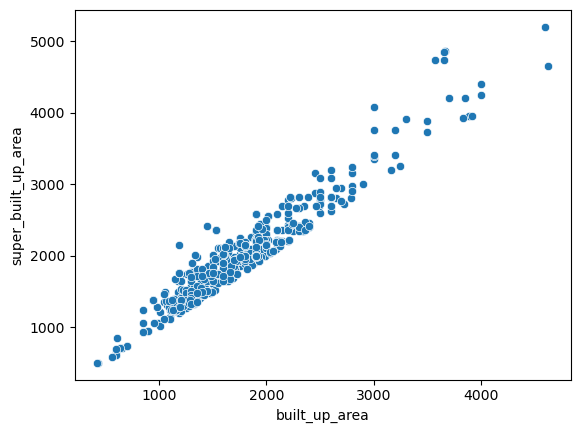

In [7]:
sns.scatterplot(x='built_up_area',y='super_built_up_area',data=df)

<Axes: xlabel='built_up_area', ylabel='carpet_area'>

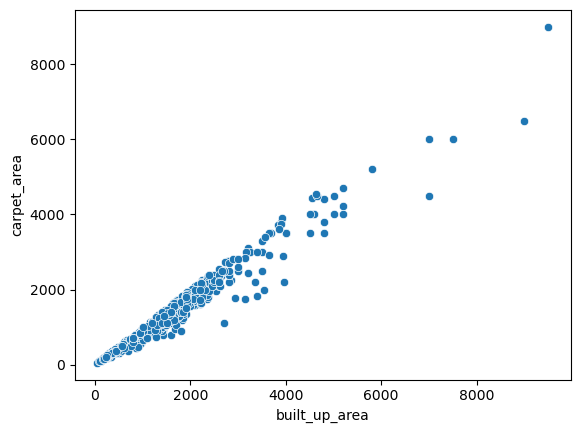

In [8]:
sns.scatterplot(x='built_up_area',y='carpet_area',data=df)

In [10]:
((df['super_built_up_area'].isnull()) & (df['built_up_area'].isnull()) & (df['carpet_area'].isnull()))

0       False
1       False
2       False
3       False
4       False
        ...  
3245    False
3246    False
3247    False
3248    False
3249    False
Length: 3250, dtype: bool

In [11]:
# where 3 rows available
all_present_df = df[~((df['super_built_up_area'].isnull()) | (df['built_up_area'].isnull()) | (df['carpet_area'].isnull()))]

In [12]:
all_present_df.shape

(489, 25)

In [13]:
super_to_built_up_ratio = (all_present_df['super_built_up_area']/all_present_df['built_up_area']).median()

In [14]:
carpet_to_built_up_ratio = (all_present_df['carpet_area']/all_present_df['built_up_area']).median()

In [15]:
print(super_to_built_up_ratio, carpet_to_built_up_ratio)

1.1115107913669064 0.9


In [16]:
# both present built up null but not carpet_area
sbc_df = df[~(df['super_built_up_area'].isnull()) & (df['built_up_area'].isnull()) & ~(df['carpet_area'].isnull())]

In [17]:
sbc_df.head()

,society,property_type,price,price_per_sqft,areaWithType,area,bedRoom,bathroom,balcony,floorNum,facing,agePossession,property_id,sector,super_built_up_area,built_up_area,carpet_area,study room,servant room,store room,pooja room,others,furnishing_type,luxury_score,area_room_ratio
6,shapoorji pallonji joyville gurugram,flat,1.99,20665.0,Super Built up area 1349(125.33 sq.m.)Carpet a...,963.0,2.0,2,2,14.0,South,New Property,V69824946,sector 102,1349.0,NaN,963.0,0,0,0,0,0,0,152,481.5
8,tarc maceo,flat,0.89,6339.0,Super Built up area 1404(130.44 sq.m.)Carpet a...,1404.0,2.0,2,3+,9.0,East,Relatively New,G68726244,sector 91,1404.0,NaN,1200.0,0,0,0,0,1,2,13,702.0
10,shapoorji pallonji joyville gurugram,flat,1.20,14563.0,Super Built up area 1359(126.26 sq.m.)Carpet a...,824.0,2.0,2,3,0.0,North-East,Relatively New,T69179276,sector 102,1359.0,NaN,824.0,0,0,0,0,0,0,49,412.0
12,emaar palm gardens,flat,1.35,12329.0,Super Built up area 1720(159.79 sq.m.)Carpet a...,1095.0,3.0,3,3,7.0,South-West,Relatively New,O55737304,sector 83,1720.0,NaN,1095.3,0,1,0,0,0,0,24,365.0
28,alpha corp gurgaonone,flat,0.85,6693.0,Super Built up area 1270(117.99 sq.m.)Carpet a...,1270.0,2.0,2,3,6.0,West,Relatively New,I69430670,sector 84,1270.0,NaN,1050.0,0,0,0,0,0,2,28,635.0


In [18]:
sbc_df['built_up_area'].fillna(round(((sbc_df['super_built_up_area']/1.111) + (sbc_df['carpet_area']/0.9))/2),inplace=True)

C:\Users\SONY\AppData\Local\Temp\ipykernel_5704\2064187664.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  sbc_df['built_up_area'].fillna(round(((sbc_df['super_built_up_area']/1.111) + (sbc_df['carpet_area']/0.9))/2),inplace=True)
C:\Users\SONY\AppData\Local\Temp\ipykernel_5704\2064187664.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
 

In [19]:
df.update(sbc_df)

In [20]:
df.isnull().sum()

society                   1
property_type             0
price                     0
price_per_sqft            0
areaWithType              0
area                      0
bedRoom                   0
bathroom                  0
balcony                   0
floorNum                 19
facing                  884
agePossession             0
property_id             802
sector                    0
super_built_up_area    1546
built_up_area          1307
carpet_area            1638
study room                0
servant room              0
store room                0
pooja room                0
others                    0
furnishing_type           0
luxury_score              0
area_room_ratio           0
dtype: int64

In [21]:
# sb present carpet_area is null built_area up null
sb_df = df[~(df['super_built_up_area'].isnull()) & (df['built_up_area'].isnull()) & (df['carpet_area'].isnull())]

In [22]:
sb_df['built_up_area'].fillna(round(sb_df['super_built_up_area']/1.111),inplace=True)

C:\Users\SONY\AppData\Local\Temp\ipykernel_5704\421654604.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  sb_df['built_up_area'].fillna(round(sb_df['super_built_up_area']/1.111),inplace=True)
C:\Users\SONY\AppData\Local\Temp\ipykernel_5704\421654604.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sb_df['built_up_area'].fillna(round(sb_

In [23]:
df.update(sb_df)

In [24]:
df.isnull().sum()

society                   1
property_type             0
price                     0
price_per_sqft            0
areaWithType              0
area                      0
bedRoom                   0
bathroom                  0
balcony                   0
floorNum                 19
facing                  884
agePossession             0
property_id             802
sector                    0
super_built_up_area    1546
built_up_area           526
carpet_area            1638
study room                0
servant room              0
store room                0
pooja room                0
others                    0
furnishing_type           0
luxury_score              0
area_room_ratio           0
dtype: int64

In [25]:
# super_built_up_area null carpert_area is present built_up_area up null
c_df = df[(df['super_built_up_area'].isnull()) & (df['built_up_area'].isnull()) & ~(df['carpet_area'].isnull())]

In [26]:
c_df.head()

,society,property_type,price,price_per_sqft,areaWithType,area,bedRoom,bathroom,balcony,floorNum,facing,agePossession,property_id,sector,super_built_up_area,built_up_area,carpet_area,study room,servant room,store room,pooja room,others,furnishing_type,luxury_score,area_room_ratio
11,dlf the primus,flat,2.25,10714.0,Carpet area: 2100 (195.1 sq.m.),2100.0,3.0,3,3+,29.0,East,Relatively New,Y62594040,sector 82,NaN,NaN,2100.00000,0,1,0,0,0,1,72,700.000000
13,m3m skycity,flat,3.50,17040.0,Carpet area: 2054 (190.82 sq.m.),2054.0,3.0,3,3,15.0,East,New Property,Y69073178,sector 65,NaN,NaN,2054.00000,1,1,0,1,0,2,166,684.666667
17,puri the aravallis,flat,3.90,33220.0,Carpet area: 1249.65 (116.1 sq.m.),1174.0,3.0,4,3+,33.0,South,Under Construction,D69436810,sector 61,NaN,NaN,1249.68879,0,1,0,0,0,0,158,391.333333
19,emaar digihomes,flat,4.25,26562.0,Carpet area: 1600 (148.64 sq.m.),1600.0,3.0,3,3,8.0,NaN,Under Construction,J68201818,sector 62,NaN,NaN,1600.00000,1,0,0,0,0,0,16,533.333333
23,palam vihar extension west zone rwa,house,0.35,6481.0,Plot area 600(55.74 sq.m.)Carpet area: 540 sq....,540.0,2.0,2,0,1.0,North-East,New Property,NaN,sector 110,NaN,NaN,540.00000,0,0,0,0,0,0,0,270.000000


In [27]:
# filled buit_up_area
c_df['built_up_area'].fillna(round(c_df['carpet_area']/0.9),inplace=True)

C:\Users\SONY\AppData\Local\Temp\ipykernel_5704\3443542902.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  c_df['built_up_area'].fillna(round(c_df['carpet_area']/0.9),inplace=True)
C:\Users\SONY\AppData\Local\Temp\ipykernel_5704\3443542902.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  c_df['built_up_area'].fillna(round(c_df['carpet_a

In [28]:
df.update(c_df)

In [42]:
df['built_up_area'].head()

0    1600.0
1    1239.0
2    2600.0
3    6228.0
4    1575.0
Name: built_up_area, dtype: float64

In [43]:
df.isnull().sum()

society                   1
property_type             0
price                     0
price_per_sqft            0
areaWithType              0
area                      0
bedRoom                   0
bathroom                  0
balcony                   0
floorNum                 19
facing                  884
agePossession             0
property_id             802
sector                    0
super_built_up_area    1545
built_up_area             0
carpet_area            1638
study room                0
servant room              0
store room                0
pooja room                0
others                    0
furnishing_type           0
luxury_score              0
area_room_ratio           0
dtype: int64

<Axes: xlabel='built_up_area', ylabel='price'>

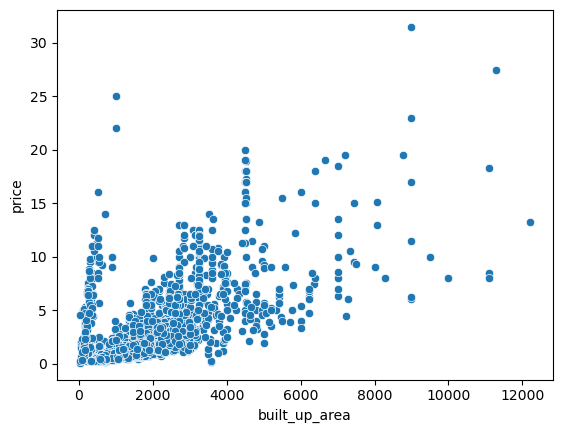

In [44]:
sns.scatterplot(x='built_up_area',y='price',data=df)

In [45]:
df[df['built_up_area'] > 15000]

,society,property_type,price,price_per_sqft,areaWithType,area,bedRoom,bathroom,balcony,floorNum,facing,agePossession,property_id,sector,super_built_up_area,built_up_area,carpet_area,study room,servant room,store room,pooja room,others,furnishing_type,luxury_score,area_room_ratio


In [46]:
df=df[df['built_up_area'] <= 15000]

<Axes: xlabel='built_up_area', ylabel='price'>

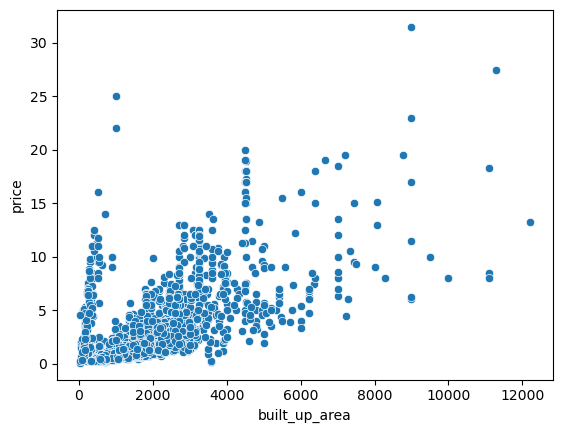

In [47]:
sns.scatterplot(x='built_up_area',y='price',data=df)

In [48]:
# df[['built_up_area','price']].head(20)

In [49]:
anamoly_df = df[(df['built_up_area'] < 2000) & (df['price'] > 2.5)][['price','area','built_up_area']]

In [56]:
anamoly_df['built_up_area'] = anamoly_df['area']

In [57]:
df.update(anamoly_df)

<Axes: xlabel='built_up_area', ylabel='price'>

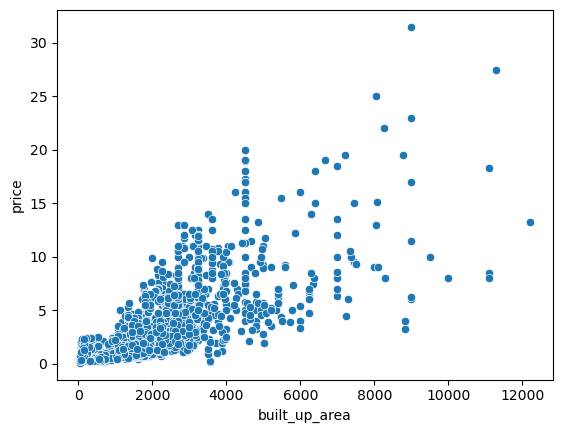

In [58]:
sns.scatterplot(x='built_up_area',y='price',data=df)

In [59]:
df.drop(columns=['area','areaWithType','super_built_up_area','carpet_area'],inplace=True)

In [60]:
df.head()

,society,property_type,price,price_per_sqft,bedRoom,bathroom,balcony,floorNum,facing,agePossession,property_id,sector,built_up_area,study room,servant room,store room,pooja room,others,furnishing_type,luxury_score,area_room_ratio
0,emaar palm gardens,flat,1.75,9211.0,3.0,3,3,6.0,West,Relatively New,V69525180,sector 83,1600.0,0,1,0,0,0,2,150,633.333333
1,eros wembley estate,flat,1.40,10174.0,3.0,3,2,9.0,East,Relatively New,K69325724,sector 50,1239.0,0,0,1,0,0,2,117,458.666667
2,ss the leaf,flat,2.13,7575.0,4.0,4,3,6.0,North,Relatively New,K70087544,sector 85,2600.0,0,0,0,0,0,0,49,703.000000
3,international city by sobha phase 2,house,6.25,10035.0,5.0,7,3+,3.0,North-East,Relatively New,NaN,sector 109,6228.0,1,1,1,1,0,0,147,1245.600000
4,ss the coralwood,flat,1.10,4857.0,3.0,3,2,9.0,North,Relatively New,H66415758,sector 84,1575.0,0,0,0,0,0,0,75,755.000000


In [61]:
df.isnull().sum()

society              1
property_type        0
price                0
price_per_sqft       0
bedRoom              0
bathroom             0
balcony              0
floorNum            19
facing             884
agePossession        0
property_id        802
sector               0
built_up_area        0
study room           0
servant room         0
store room           0
pooja room           0
others               0
furnishing_type      0
luxury_score         0
area_room_ratio      0
dtype: int64

### floorNum

In [62]:
df[df['floorNum'].isnull()]

,society,property_type,price,price_per_sqft,bedRoom,bathroom,balcony,floorNum,facing,agePossession,property_id,sector,built_up_area,study room,servant room,store room,pooja room,others,furnishing_type,luxury_score,area_room_ratio
154,dlf new town heights,house,2.47,7719.0,4.0,4,3+,NaN,West,Moderately Old,NaN,sector 86,2800.0,0,1,0,1,0,2,130,800.000000
219,independent,house,1.10,8148.0,2.0,2,1,NaN,NaN,Old Property,NaN,sector 10,150.0,0,0,0,0,1,0,0,675.000000
438,independent,house,5.60,17284.0,8.0,6,3+,NaN,South-West,Moderately Old,NaN,sector 2,3240.0,1,1,1,1,0,0,0,405.000000
474,NaN,flat,0.60,3692.0,2.0,2,0,NaN,NaN,Under Construction,T8073153,sector 78,1625.0,0,0,0,0,0,0,0,812.500000
571,independent,house,0.65,11111.0,4.0,2,2,NaN,NaN,Moderately Old,NaN,sector 4,585.0,0,0,0,0,0,0,0,146.250000
784,independent,house,1.45,2984.0,3.0,3,1,NaN,NaN,Old Property,NaN,sector 24,540.0,0,0,0,0,0,0,9,1620.000000
1009,independent,house,1.50,10288.0,3.0,3,0,NaN,NaN,Old Property,NaN,sector 3,210.0,0,0,0,0,0,0,0,486.000000
1184,independent,house,13.00,45710.0,6.0,8,3+,NaN,NaN,Relatively New,NaN,sector 25,2844.0,1,1,1,1,0,1,0,474.000000
1230,ansal sushant lok plots,house,3.30,26570.0,1.0,1,0,NaN,NaN,Under Construction,NaN,sector 43,1242.0,0,0,0,0,0,0,0,1242.000000
1412,jacob pura,house,0.35,9722.0,2.0,1,0,NaN,NaN,Old Property,NaN,sector 12,360.0,0,0,0,0,0,0,0,180.000000


In [63]:
df[df['property_type'] == 'house']['floorNum'].median()

2.0

In [64]:
df['floorNum'].fillna(2.0,inplace=True)

C:\Users\SONY\AppData\Local\Temp\ipykernel_5704\15612474.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['floorNum'].fillna(2.0,inplace=True)


In [65]:
df.isnull().sum()

society              1
property_type        0
price                0
price_per_sqft       0
bedRoom              0
bathroom             0
balcony              0
floorNum             0
facing             884
agePossession        0
property_id        802
sector               0
built_up_area        0
study room           0
servant room         0
store room           0
pooja room           0
others               0
furnishing_type      0
luxury_score         0
area_room_ratio      0
dtype: int64

In [66]:
1011/df.shape[0]

0.31117266851338876

### facing

<Axes: ylabel='count'>

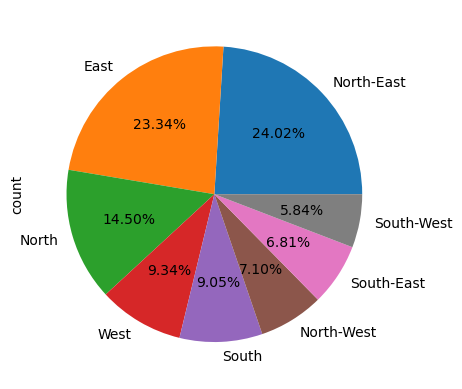

In [67]:
df['facing'].value_counts().plot(kind='pie',autopct='%0.2f%%')

In [68]:
df.drop(columns=['facing'],inplace=True)

In [69]:
df.sample(5)

,society,property_type,price,price_per_sqft,bedRoom,bathroom,balcony,floorNum,agePossession,property_id,sector,built_up_area,study room,servant room,store room,pooja room,others,furnishing_type,luxury_score,area_room_ratio
2374,dlf the ultima,flat,2.50,11726.0,3.0,3,2,4.0,Relatively New,S69236546,sector 81,2130.0,0,1,0,0,0,1,82,710.666667
2431,emaar mgf emerald floors premier,flat,2.90,14684.0,4.0,4,0,0.0,Relatively New,V57733226,sector 65,2194.0,0,0,1,0,0,0,50,493.750000
1452,independent,house,5.50,23061.0,8.0,8,3+,3.0,Moderately Old,NaN,sector 46,2385.0,1,0,0,0,1,2,32,298.125000
553,m3m woodshire,flat,1.40,5930.0,3.0,4,0,1.0,New Property,G55426686,sector 107,2125.0,0,0,0,0,0,0,67,787.000000
622,ambience creacions,flat,3.99,12913.0,3.0,5,3+,3.0,New Property,P30918183,sector 22,2781.0,0,1,0,0,0,1,102,1030.000000


In [70]:
df.isnull().sum()

society              1
property_type        0
price                0
price_per_sqft       0
bedRoom              0
bathroom             0
balcony              0
floorNum             0
agePossession        0
property_id        802
sector               0
built_up_area        0
study room           0
servant room         0
store room           0
pooja room           0
others               0
furnishing_type      0
luxury_score         0
area_room_ratio      0
dtype: int64

In [71]:
df.drop(index=[2536],inplace=True)

In [72]:
df.isnull().sum()

society              1
property_type        0
price                0
price_per_sqft       0
bedRoom              0
bathroom             0
balcony              0
floorNum             0
agePossession        0
property_id        802
sector               0
built_up_area        0
study room           0
servant room         0
store room           0
pooja room           0
others               0
furnishing_type      0
luxury_score         0
area_room_ratio      0
dtype: int64

### agePossession

In [73]:
df['agePossession'].value_counts()

agePossession
Relatively New        1504
Moderately Old         486
New Property           477
Undefined              289
Old Property           275
Under Construction     217
Name: count, dtype: int64

In [74]:
df[df['agePossession'] == 'Undefined']

,society,property_type,price,price_per_sqft,bedRoom,bathroom,balcony,floorNum,agePossession,property_id,sector,built_up_area,study room,servant room,store room,pooja room,others,furnishing_type,luxury_score,area_room_ratio
20,sare crescent parc,flat,0.82,5384.0,3.0,3,3+,12.0,Undefined,T68022426,sector 92,1523.0,0,0,0,0,0,0,0,507.666667
24,shapoorji pallonji joyville gurugram,flat,0.95,10383.0,2.0,2,2,14.0,Undefined,P69078414,sector 102,915.0,0,0,0,0,0,0,0,457.500000
52,signature global orchard avenue,flat,0.85,14238.0,2.0,2,0,10.0,Undefined,K69125930,sector 93,597.0,0,0,0,0,0,0,0,298.500000
54,aipl zen residences,flat,1.25,9905.0,2.0,2,3,19.0,Undefined,U68368438,sector 70,1402.0,0,0,0,0,0,0,0,631.000000
55,sare green parc,flat,0.85,6538.0,3.0,2,2,20.0,Undefined,Y68788154,sector 92,1300.0,0,0,0,0,0,0,0,433.333333
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3188,independent,house,1.25,8681.0,2.0,3,0,1.0,Undefined,NaN,sector 4,160.0,0,0,0,0,0,0,0,720.000000
3194,independent,house,0.55,4583.0,2.0,2,0,2.0,Undefined,NaN,sector 10,1333.0,0,0,0,0,0,0,0,600.000000
3200,signature global city,flat,1.10,9839.0,2.0,2,2,4.0,Undefined,S68639866,sector 93,1242.0,0,0,0,0,0,0,59,559.000000
3222,vatika independent floors,flat,1.45,8056.0,4.0,3,0,1.0,Undefined,M69926636,sector 82,1800.0,0,0,0,0,0,0,50,450.000000


In [75]:
def mode_based_imputation(row):
    if row['agePossession'] == 'Undefined':
        mode_value = df[(df['sector'] == row['sector']) & (df['property_type'] == row['property_type'])]['agePossession'].mode()
        # If mode_value is empty (no mode found), return NaN, otherwise return the mode
        if not mode_value.empty:
            return mode_value.iloc[0] 
        else:
            return np.nan
    else:
        return row['agePossession']

In [76]:
df['agePossession'] = df.apply(mode_based_imputation,axis=1)

In [77]:
df['agePossession'].value_counts()

agePossession
Relatively New        1615
Moderately Old         530
New Property           504
Old Property           320
Under Construction     229
Undefined               50
Name: count, dtype: int64

In [78]:
def mode_based_imputation2(row):
    if row['agePossession'] == 'Undefined':
        mode_value = df[(df['sector'] == row['sector'])]['agePossession'].mode()
        # If mode_value is empty (no mode found), return NaN, otherwise return the mode
        if not mode_value.empty:
            return mode_value.iloc[0] 
        else:
            return np.nan
    else:
        return row['agePossession']

In [79]:
df['agePossession'] = df.apply(mode_based_imputation2,axis=1)

In [80]:
df['agePossession'].value_counts()

agePossession
Relatively New        1628
Moderately Old         535
New Property           505
Old Property           327
Under Construction     229
Undefined               24
Name: count, dtype: int64

In [81]:
def mode_based_imputation3(row):
    if row['agePossession'] == 'Undefined':
        mode_value = df[(df['property_type'] == row['property_type'])]['agePossession'].mode()
        # If mode_value is empty (no mode found), return NaN, otherwise return the mode
        if not mode_value.empty:
            return mode_value.iloc[0] 
        else:
            return np.nan
    else:
        return row['agePossession']

In [82]:
df['agePossession'] = df.apply(mode_based_imputation3,axis=1)

In [83]:
df['agePossession'].value_counts()

agePossession
Relatively New        1633
Moderately Old         554
New Property           505
Old Property           327
Under Construction     229
Name: count, dtype: int64

In [84]:
df.isnull().sum()

society              1
property_type        0
price                0
price_per_sqft       0
bedRoom              0
bathroom             0
balcony              0
floorNum             0
agePossession        0
property_id        802
sector               0
built_up_area        0
study room           0
servant room         0
store room           0
pooja room           0
others               0
furnishing_type      0
luxury_score         0
area_room_ratio      0
dtype: int64

In [85]:
df.to_csv('C:/Users/SONY/Machine_Learning_Project/Processed_Data/gurgaon_properties_missing_value_imputation.csv',index=False)

In [86]:
df.shape

(3248, 20)